In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (22, 12)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
events = pd.read_csv('events.csv')

In [3]:
events.head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [62]:
events.shape

(2494423, 22)

In [63]:
atributes_null = (events.isna().sum().sort_values() / events.shape[0]) * 100

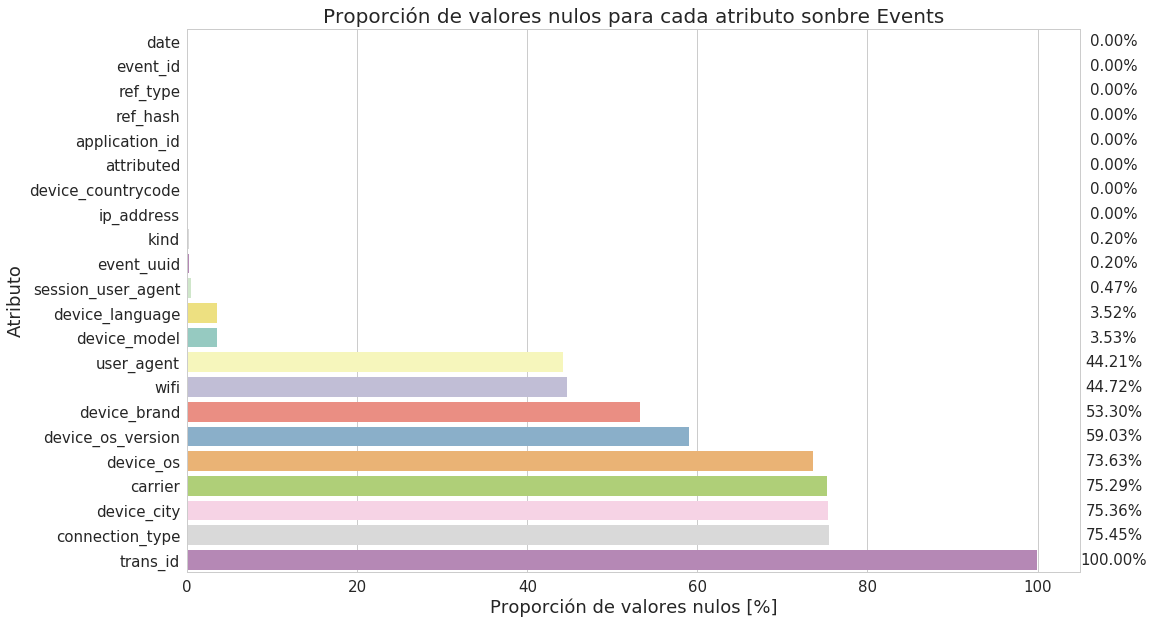

In [64]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette=sns.color_palette("Set3", 23), orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo sonbre Events", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

In [65]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [66]:
events['date_dt'] = pd.to_datetime(events.date, utc=True)
events.device_os.fillna("Vacio", inplace=True)
events.connection_type.fillna("Vacio", inplace=True)

In [67]:
#Solo un pais hay
events.device_countrycode.value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [6]:
events.wifi.fillna("Vacio", inplace=True)
events.wifi.value_counts()

Vacio    1115551
True      930902
False     447970
Name: wifi, dtype: int64

## Mayoria datos nulls 

In [68]:
#Columnas llenas de nulls
events_nulls = events.loc[: ,["date_dt","connection_type", 'device_os', 'device_city', 'carrier','device_os_version']]
events_nulls["Cantidad"] = 1
events_nulls.fillna("Vacio", inplace= True)
events_nulls

,date_dt,connection_type,device_os,device_city,carrier,device_os_version,Cantidad
0,2019-03-05 00:09:36.966000+00:00,Cable/DSL,7.53167e+18,3.25822e+18,2.24816e+17,5.9087e+17,1
1,2019-03-05 00:09:38.920000+00:00,Cable/DSL,7.53167e+18,3.25822e+18,2.24816e+17,5.9087e+17,1
2,2019-03-05 00:09:26.195000+00:00,Cable/DSL,7.53167e+18,3.25822e+18,2.24816e+17,5.9087e+17,1
3,2019-03-05 00:09:31.107000+00:00,Cable/DSL,7.53167e+18,2.55178e+18,2.24816e+17,5.9087e+17,1
4,2019-03-09 21:00:36.585000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1
5,2019-03-09 20:29:45.449000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1
6,2019-03-09 20:29:40.602000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1
7,2019-03-09 20:45:12.067000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1
8,2019-03-09 20:40:07.977000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1
9,2019-03-09 20:27:09.984000+00:00,Cable/DSL,7.53167e+18,6.95933e+18,2.24816e+17,7.39184e+18,1


In [69]:
events_nulls.device_city.value_counts()

Vacio                     1879725
3.800079948896775e+18      561876
2.551781375196177e+18       11193
3.2582150459884605e+18       4442
8.223209269143922e+18        4393
8.578626579239988e+17        2497
8.985217056239735e+18        2203
7.602876036620469e+18        1945
6.276065650874414e+17        1924
2.04899235646198e+18         1851
5.801433683024338e+18        1848
6.102141091106202e+18        1591
1.16468287562278e+18         1123
4.424622958865068e+18        1061
4.112218452429753e+18         958
1.1895429525854323e+17        912
4.847858242945663e+17         756
8.235236537216162e+18         744
6.959330348495504e+18         713
2.7153246760351273e+18        631
1.2816911001604083e+18        599
5.847627926933047e+18         591
8.318795483645021e+18         574
6.434016956850084e+17         514
1.3535971026191767e+18        505
7.425634410263832e+18         486
7.60148454103576e+18          472
5.261773315746305e+18         425
1.0840811693621105e+18        413
8.127301688691

In [75]:
#Cantidad de ciudades                                                         resto uno por el dato Vacio
events_nulls.groupby("device_city").agg({'Cantidad': 'sum'}).reset_index()["device_city"].count() - 1

127

In [71]:
events_nulls.device_os_version.value_counts()

Vacio                     1472357
4.3537503246500966e+18     277691
7.391843585977942e+18      104170
8.824598512074041e+18       77947
1.6273135773546924e+18      58099
4.823236647981168e+18       47501
2.85370396744477e+18        46823
2.635068060671423e+18       41978
5.908703034097298e+17       38321
8.530335778938208e+17       33964
8.218259696094498e+18       31563
4.5840844605486546e+18      30944
7.008467012956373e+18       27302
5.940957351303096e+18       24224
4.466870626275729e+18       21876
8.840145871557405e+18       20197
5.577468495817814e+18       19307
8.913929730553543e+18       15515
3.56844623815159e+18        14698
8.806974323879854e+18       14174
5.432641194361305e+18        9740
4.967033121496544e+18        6970
4.953783083284584e+18        6270
6.10686129079723e+18         4304
5.668904594719908e+18        4191
2.628777490844412e+18        3824
5.568789074483471e+18        3669
5.034511441443623e+18        2803
4.646970999381444e+18        2771
5.438928456834

In [76]:
#Cantidad de versiones de OS
events_nulls.groupby("device_os_version").agg({'Cantidad': 'sum'}).reset_index()["device_os_version"].count() - 1

81

In [111]:
events_nulls.device_os.value_counts()
#Estos datos se pueden llenar con el device model, si es que sabemos cuales es el divice_model
#Tiene que ser Andriod, Ios y los otros dos nose podrian ser Windows? y Nextel??

Vacio                     1836756
7.531669329342817e+18      389811
6.94182462626038e+18       260861
2.7488313570525307e+18       6110
5.916186881232351e+18         885
Name: device_os, dtype: int64

In [79]:
#Cantidad de sistemas operativos
events_nulls.groupby("device_os").agg({'Cantidad': 'sum'}).reset_index()["device_os"].count() -1 

4

In [80]:
#No se que es carrier (traduccion: portador)
events_nulls.carrier.value_counts()

Vacio                     1877989
2.2481569642543155e+17     436983
1.1795872560140132e+18      80958
7.855224497172787e+18       58478
6.948827726700092e+18       29574
3.570805180856832e+18        3457
4.890488855514004e+18        2527
7.232922439046281e+18        1491
7.216101851670709e+18         539
1.7576903483791066e+18        464
3.1349838132534666e+18        336
2.58683288719403e+18          311
8.005033990448529e+18         227
2.276828313171018e+17         185
3.751135050063284e+18         145
5.851845794617676e+18         121
1.4010825245156086e+18         73
3.550680419448072e+18          66
5.255184358353569e+18          58
5.926614067260969e+18          36
6.046846537041924e+18          33
2.198851069839665e+18          29
4.699500034143048e+18          17
1.8329019614137016e+18         17
7.87498164012504e+18           15
1.312636194459128e+18          15
4.958858478611984e+17          15
8.628827427227625e+18          14
2.580400656600893e+18          14
5.062450154346

In [81]:
events_nulls.groupby("carrier").agg({'Cantidad': 'sum'}).reset_index()["carrier"].count() -1 

84

# Ver fechas

##### Todos los datos 

In [19]:
events.date_dt.value_counts()

2019-03-12 14:36:58.017000+00:00    3
2019-03-08 00:55:23.364000+00:00    3
2019-03-09 00:12:42.354000+00:00    3
2019-03-12 22:03:19.213000+00:00    3
2019-03-12 23:00:08.146000+00:00    3
2019-03-08 02:31:09.128000+00:00    3
2019-03-07 01:57:38.934000+00:00    3
2019-03-10 02:30:07.786000+00:00    3
2019-03-12 13:59:31.416000+00:00    3
2019-03-09 21:58:48.782000+00:00    3
2019-03-11 23:22:55.179000+00:00    3
2019-03-11 15:35:04.327000+00:00    2
2019-03-08 23:56:12.056000+00:00    2
2019-03-05 14:13:52.465000+00:00    2
2019-03-09 00:00:33.377000+00:00    2
2019-03-07 23:18:39.146000+00:00    2
2019-03-09 16:45:57.573000+00:00    2
2019-03-07 18:20:27.665000+00:00    2
2019-03-09 04:38:45.865000+00:00    2
2019-03-11 15:41:40.209000+00:00    2
2019-03-07 00:11:55.681000+00:00    2
2019-03-08 23:13:31.170000+00:00    2
2019-03-11 00:40:46.506000+00:00    2
2019-03-11 04:09:22.967000+00:00    2
2019-03-07 16:50:59.211000+00:00    2
2019-03-07 02:17:01.335000+00:00    2
2019-03-05 1

In [20]:
events.date_dt.min()

Timestamp('2019-03-05 00:00:00.255000+0000', tz='UTC')

In [21]:
events.date_dt.max()

Timestamp('2019-03-13 23:59:59.984000+0000', tz='UTC')

#### Datos nulls 

In [85]:
#¿Puede ser que los datos nulls tengan que ver por estar dentro de alguna fraja horaria?

In [86]:
events_nulls.date_dt.min()

Timestamp('2019-03-05 00:00:00.255000+0000', tz='UTC')

In [87]:
events_nulls.date_dt.max()

Timestamp('2019-03-13 23:59:59.984000+0000', tz='UTC')

LOS DATOS NULLS NO TIENEN QUE VER CON LOS DATOS RECOLECTADOS A CIERTA HORA... TODOS LOS DATOS (NULLS Y NO NULLS) SE ENCUENTRAN DENTRO DE LA MISMA FRANJA HORARIA. NO SE PUEDE SACAR NINGUNA CONCLUCION POR AHORA

In [103]:
# ¿Puede ser que dependiendo del tipo de conexion los datos de otros campos sean todos nulls?

In [88]:
events_nulls.connection_type.value_counts()

Vacio        1881960
Cable/DSL     331948
Cellular      280511
Corporate          4
Name: connection_type, dtype: int64

In [91]:
events_connection = events_nulls.loc[(events_nulls.connection_type == "Vacio")]
events_connection

,date_dt,connection_type,device_os,device_city,carrier,device_os_version,Cantidad
154,2019-03-08 18:19:40.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
155,2019-03-08 18:19:56.878000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
156,2019-03-06 16:07:59.338000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
157,2019-03-07 13:54:48.941000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
158,2019-03-07 13:54:44.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
159,2019-03-05 22:34:26.295000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
160,2019-03-05 22:01:30.063000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
161,2019-03-05 22:06:39.967000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
162,2019-03-05 21:49:15.200000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
163,2019-03-05 21:59:05.597000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1


In [94]:
events_connection.device_os.value_counts()
#Se observa que hay conexiones nulls que tienen datos en otros campos
#No se puede sacar una conclusion todavia

Vacio                     1836756
7.531669329342817e+18       19825
6.94182462626038e+18        18384
2.7488313570525307e+18       6110
5.916186881232351e+18         885
Name: device_os, dtype: int64

In [95]:
#Pruebo con device_os

In [98]:
events_nulls_device_os = events_nulls.loc[(events_nulls.device_os == "Vacio")]
#Si el device_os esta vacio entonces todos los demas datos estan vacios?????
events_nulls_device_os

,date_dt,connection_type,device_os,device_city,carrier,device_os_version,Cantidad
154,2019-03-08 18:19:40.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
155,2019-03-08 18:19:56.878000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
156,2019-03-06 16:07:59.338000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
157,2019-03-07 13:54:48.941000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
158,2019-03-07 13:54:44.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
159,2019-03-05 22:34:26.295000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
160,2019-03-05 22:01:30.063000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
161,2019-03-05 22:06:39.967000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
162,2019-03-05 21:49:15.200000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
163,2019-03-05 21:59:05.597000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1


In [101]:
events_nulls_device_os.carrier.value_counts()
##No todos los datos estan vacios

Vacio                     1833465
7.232922439046281e+18        1491
7.216101851670709e+18         539
2.58683288719403e+18          311
8.005033990448529e+18         227
5.851845794617676e+18         121
1.4010825245156086e+18         73
3.550680419448072e+18          66
5.255184358353569e+18          58
5.926614067260969e+18          36
6.046846537041924e+18          33
4.699500034143048e+18          17
1.8329019614137016e+18         17
7.87498164012504e+18           15
1.312636194459128e+18          15
4.958858478611984e+17          15
8.628827427227625e+18          14
5.268425616448026e+18          14
2.580400656600893e+18          14
5.0624501543466e+17            14
1.3715044630317957e+18         13
2.46191845848455e+18           13
6.882302738513979e+18          12
3.4540652488265723e+18         12
3.9255337970710656e+17         12
2.4434325627689795e+18          9
2.1265422948687447e+18          9
6.410843551072737e+18           7
7.512612244959867e+18           7
5.470116730632

In [104]:
#Veo uno mas ahora con device_city

In [108]:
events_nulls.device_city.value_counts()

Vacio                     1879725
3.800079948896775e+18      561876
2.551781375196177e+18       11193
3.2582150459884605e+18       4442
8.223209269143922e+18        4393
8.578626579239988e+17        2497
8.985217056239735e+18        2203
7.602876036620469e+18        1945
6.276065650874414e+17        1924
2.04899235646198e+18         1851
5.801433683024338e+18        1848
6.102141091106202e+18        1591
1.16468287562278e+18         1123
4.424622958865068e+18        1061
4.112218452429753e+18         958
1.1895429525854323e+17        912
4.847858242945663e+17         756
8.235236537216162e+18         744
6.959330348495504e+18         713
2.7153246760351273e+18        631
1.2816911001604083e+18        599
5.847627926933047e+18         591
8.318795483645021e+18         574
6.434016956850084e+17         514
1.3535971026191767e+18        505
7.425634410263832e+18         486
7.60148454103576e+18          472
5.261773315746305e+18         425
1.0840811693621105e+18        413
8.127301688691

In [107]:
device_city_null = events_nulls.loc[(events_nulls.device_city == "Vacio")]
device_city_null
#Se ve a simple vista que hay datos en otros campos

,date_dt,connection_type,device_os,device_city,carrier,device_os_version,Cantidad
154,2019-03-08 18:19:40.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
155,2019-03-08 18:19:56.878000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
156,2019-03-06 16:07:59.338000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
157,2019-03-07 13:54:48.941000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
158,2019-03-07 13:54:44.353000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
159,2019-03-05 22:34:26.295000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
160,2019-03-05 22:01:30.063000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
161,2019-03-05 22:06:39.967000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
162,2019-03-05 21:49:15.200000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1
163,2019-03-05 21:59:05.597000+00:00,Vacio,Vacio,Vacio,Vacio,Vacio,1


### Al parecer no hay algun campo determinante que influya en otros para que sus datos sean Nans 